In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets
from IPython.display import display, HTML

In [10]:
df = sns.load_dataset('mpg')

In [11]:
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


In [20]:
@ipywidgets.interact(x=[15,25,35])
def country_wise_scatter(x):
    sns.scatterplot(data=df, x='weight', y='mpg', s=x);

interactive(children=(Dropdown(description='x', options=(15, 25, 35), value=15), Output()), _dom_classes=('wid…

In [27]:
@ipywidgets.interact(x=True)
def country_wise_scatter(x):
    sns.scatterplot(data=df, x='horsepower', y='mpg', style='origin');

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

In [28]:
@ipywidgets.interact(x=['origin', 'cylinders'])
def mpg_distribution_by_category(x='origin'):
    sns.histplot(data=df, x='mpg', hue=x)

interactive(children=(Dropdown(description='x', options=('origin', 'cylinders'), value='origin'), Output()), _…

In [29]:
ipywidgets.IntSlider()

IntSlider(value=0)

In [30]:
w = ipywidgets.IntSlider()
display(w)

IntSlider(value=0)

In [31]:
w.value

49

In [32]:
w.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

In [38]:
ipywidgets.IntSlider(step=2, description='Value: ')

IntSlider(value=0, description='Value: ', step=2)

In [39]:
@ipywidgets.interact(country=['japan', 'europe', 'usa'])
def mpg_distribution_by_category(country='usa'):
    sns.histplot(data=df.loc[df.origin == country], x='mpg', hue='cylinders')

interactive(children=(Dropdown(description='country', index=2, options=('japan', 'europe', 'usa'), value='usa'…

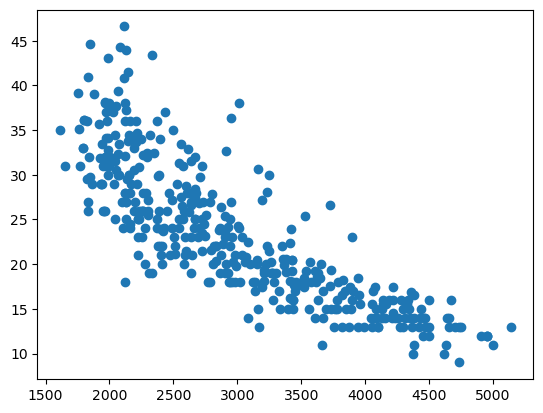

In [50]:
plt.scatter(data=df, x='weight', y='mpg')

In [51]:
from sklearn.linear_model import LinearRegression

In [58]:
df.dropna(how='any', inplace=True)

reg = LinearRegression()
reg.fit(df.loc[:, ['horsepower']], df.loc[:, ['mpg']])

LinearRegression()

In [59]:
reg.intercept_

array([39.93586102])

In [60]:
reg.coef_

array([[-0.15784473]])

In [70]:
df['y'] = df.horsepower.apply(lambda x: x*reg.coef_ + reg.intercept_)

In [84]:
ipywidgets.RadioButtons()

@ipywidgets.interact(m=(0.5, 3.5, 0.5))
def slope_viz(m=1):
    plt.scatter(x=df.horsepower, y=df.mpg)
    plt.plot(df.horsepower, m*df.y, lw=3, c='gray')

interactive(children=(FloatSlider(value=1.0, description='m', max=3.5, min=0.5, step=0.5), Output()), _dom_cla…

In [107]:
@ipywidgets.interact(country=[True, False])
def scatter_plot_cars(country=False):
    if country:
        fig = px.scatter(data_frame=df, x='weight', y='mpg', color='origin', hover_name='name')
        fig.show()
    else:
        fig = px.scatter(data_frame=df, x='weight', y='mpg', hover_name='name')
        fig.show()

interactive(children=(Dropdown(description='country', index=1, options=(True, False), value=False), Output()),…

In [95]:
df.weight.value_counts()

1985    4
2130    4
2125    3
2720    3
2945    3
       ..
3102    1
3664    1
2807    1
2660    1
2625    1
Name: weight, Length: 346, dtype: int64

In [98]:
@ipywidgets.interact(x=['horsepower', 'weight', 'acceleration'], hue=[None, 'origin', 'cylinders'])
def relationship_plot(x='horsepower', hue=None):
    sns.lmplot(data=df, x=x, y='mpg', hue=hue)

interactive(children=(Dropdown(description='x', options=('horsepower', 'weight', 'acceleration'), value='horse…